In [2]:
%reload_ext autoreload
%autoreload
%matplotlib inline

In [3]:
from fastai.vision import *

## Data Preprocessing

In [33]:
!pwd

/home/jupyter/my_experiments/plant-disease


In [11]:
PATH = Path('PlantVillage/')

In [19]:
Path.ls_ = lambda x: list(x.iterdir())

In [35]:
(PATH/'train').ls_()

[PosixPath('PlantVillage/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'),
 PosixPath('PlantVillage/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'),
 PosixPath('PlantVillage/train/Grape___healthy'),
 PosixPath('PlantVillage/train/Grape___Esca_(Black_Measles)'),
 PosixPath('PlantVillage/train/Peach___Bacterial_spot'),
 PosixPath('PlantVillage/train/Cherry_(including_sour)___Powdery_mildew'),
 PosixPath('PlantVillage/train/Tomato___Bacterial_spot'),
 PosixPath('PlantVillage/train/Raspberry___healthy'),
 PosixPath('PlantVillage/train/Apple___healthy'),
 PosixPath('PlantVillage/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus'),
 PosixPath('PlantVillage/train/Strawberry___Leaf_scorch'),
 PosixPath('PlantVillage/train/Potato___Early_blight'),
 PosixPath('PlantVillage/train/Peach___healthy'),
 PosixPath('PlantVillage/train/Tomato___Early_blight'),
 PosixPath('PlantVillage/train/Tomato___Spider_mites Two-spotted_spider_mite'),
 PosixPath('PlantVillage/train/Orange___Haunglongbing_(Ci

In [37]:
bs = 64
size = 32

In [38]:
src = ImageItemList.from_folder(PATH).split_by_folder()

In [39]:
def get_data(size, bs, padding_mode='reflection'):
    return(src.label_from_folder()
          .transform(get_transforms(), size=size, padding_mode=padding_mode)
          .databunch(bs=bs)
          .normalize(imagenet_stats))

In [49]:
# data = (ImageItemList.from_folder(PATH)
#         .split_by_folder()
#         .label_from_folder()
#         .transform(get_transforms(), size=size, padding_mode='reflection')
#         .databunch(bs=bs).normalize(imagenet_stats))

In [41]:
data = get_data(size=32, bs=64)

In [46]:
data.c

39

In [45]:
data.classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

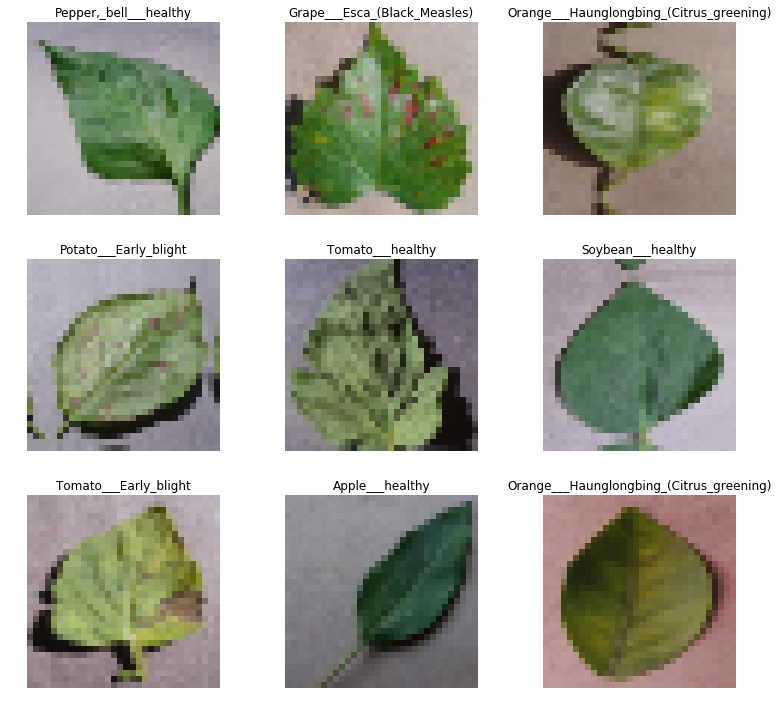

In [57]:
data.show_batch(rows=3, figsize=(11, 10))

In [54]:
data.train_ds

LabelList
y: CategoryList (44016 items)
[Category Grape___Leaf_blight_(Isariopsis_Leaf_Spot), Category Grape___Leaf_blight_(Isariopsis_Leaf_Spot), Category Grape___Leaf_blight_(Isariopsis_Leaf_Spot), Category Grape___Leaf_blight_(Isariopsis_Leaf_Spot), Category Grape___Leaf_blight_(Isariopsis_Leaf_Spot)]...
Path: PlantVillage
x: ImageItemList (44016 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: PlantVillage

In [53]:
data.valid_ds

LabelList
y: CategoryList (11004 items)
[Category Grape___Leaf_blight_(Isariopsis_Leaf_Spot), Category Grape___Leaf_blight_(Isariopsis_Leaf_Spot), Category Grape___Leaf_blight_(Isariopsis_Leaf_Spot), Category Grape___Leaf_blight_(Isariopsis_Leaf_Spot), Category Grape___Leaf_blight_(Isariopsis_Leaf_Spot)]...
Path: PlantVillage
x: ImageItemList (11004 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: PlantVillage

## Training : resnet-34

In [66]:
data.train_ds[0][0].shape

torch.Size([3, 32, 32])

In [58]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [59]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.459839,1.042704,0.309615
2,0.945872,0.646736,0.199655
3,0.752612,0.501817,0.161214
4,0.683619,0.461060,0.143039


In [60]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.692261,0.436694,0.141130
2,0.627247,0.364317,0.120683
3,0.521598,0.305922,0.099055
4,0.496017,0.299019,0.095329


In [61]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate
1,0.510307,0.302499,0.098237
2,0.469997,0.266237,0.087241
3,0.415338,0.243266,0.078608


In [62]:
learn.save('stage-1_11-cycles')

In [63]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate
1,0.443885,0.253212,0.080334
2,0.395944,0.223678,0.070156


In [64]:
learn.save('stage-1_13-cycles')

In [65]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate
1,0.435616,0.241292,0.077790
2,0.369161,0.204132,0.066976
3,0.335526,0.196601,0.062523


In [67]:
learn.save('stage-1_16-cycles')

In [68]:
interp = ClassificationInterpretation.from_learner(learn)

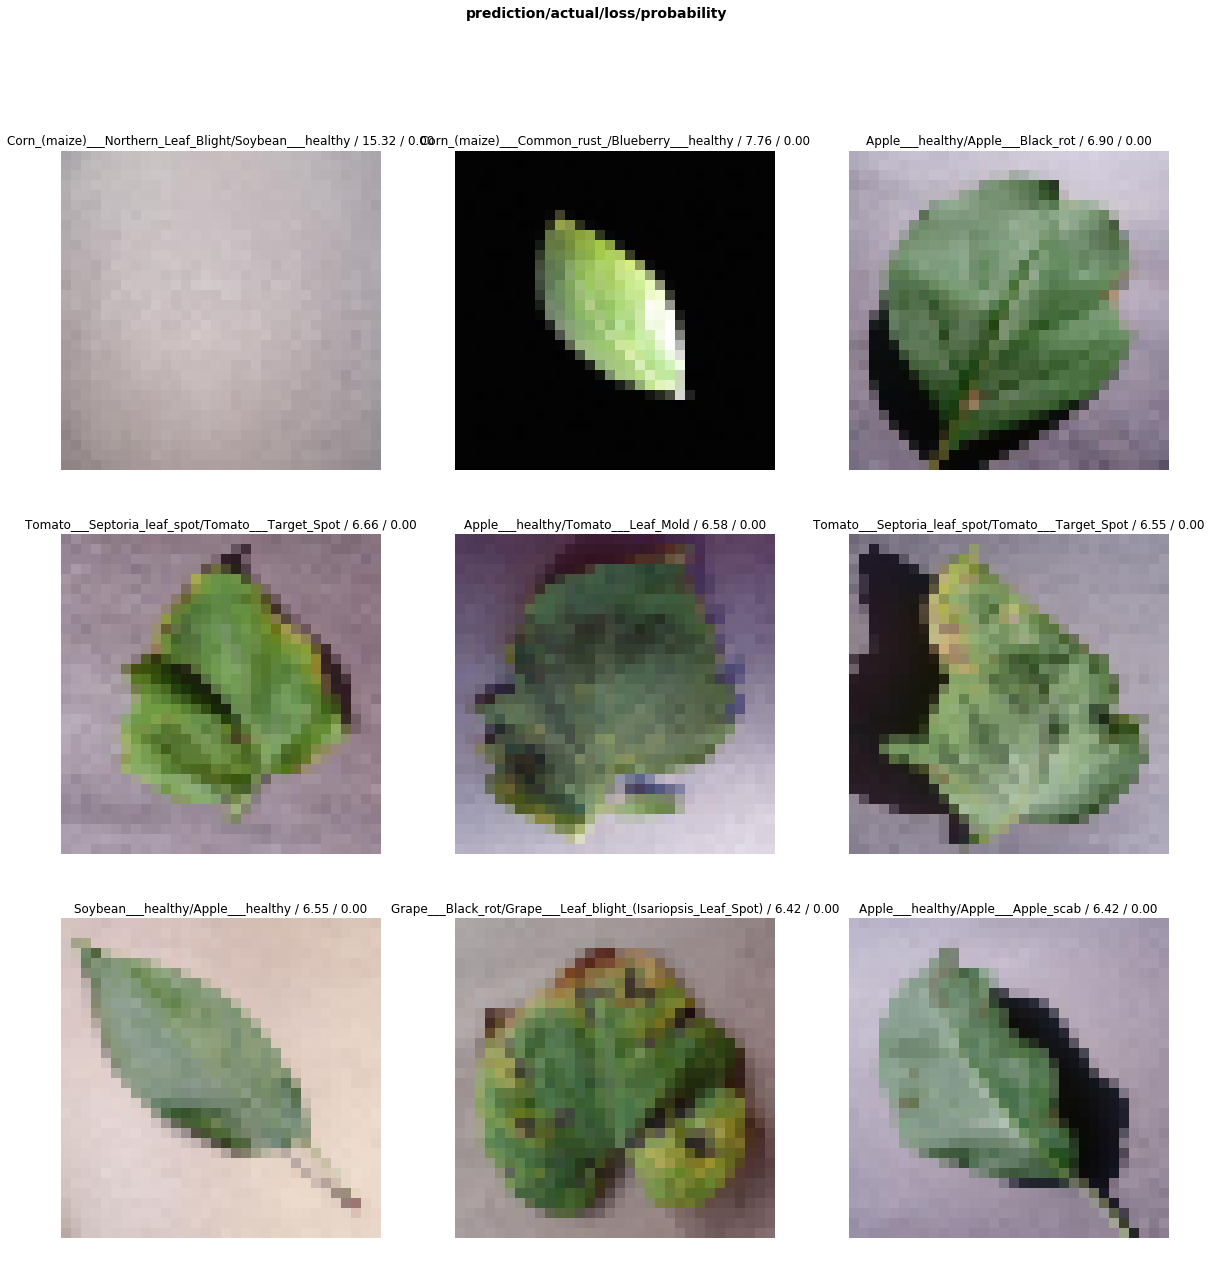

In [72]:
interp.plot_top_losses(9, figsize=(20,20))

## Unfreezing, Finetuning, Learning Rates

In [ ]:
learn.load('stage-1_16-cycles')

In [75]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


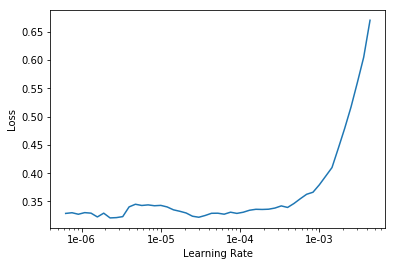

In [76]:
learn.lr_find()
learn.recorder.plot()

In [77]:
learn.fit_one_cycle(2, max_lr=slice(1e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate
1,0.294255,0.172013,0.058252
2,0.255107,0.138668,0.045165


In [91]:
learn.fit_one_cycle(2, max_lr=slice(1e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate
1,0.259700,0.139817,0.048164
2,0.191913,0.117244,0.038986


In [96]:
learn.save('stage-2-resnet34')

In [93]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

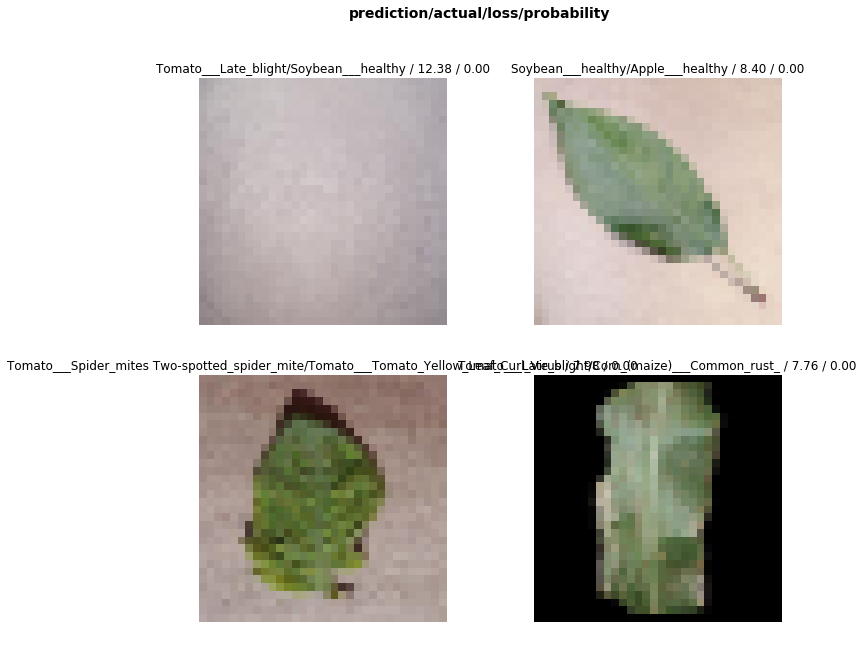

In [95]:
interp.plot_top_losses(4, figsize=(11,10))

## Training : resnet50

In [97]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [98]:
learn.fit_one_cycle(9, max_lr=slice(1e-3))

epoch,train_loss,valid_loss,error_rate
1,1.955374,1.474300,0.403853
2,1.346155,1.011180,0.297528
3,1.060720,0.748756,0.227826
4,0.855106,0.590871,0.180207
5,0.708776,0.484615,0.150854
6,0.633648,0.438080,0.130044
7,0.553511,0.385377,0.120047
8,0.547777,0.362378,0.114504
9,0.551842,0.378707,0.115503


In [99]:
learn.save('stage-1-50')

In [100]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


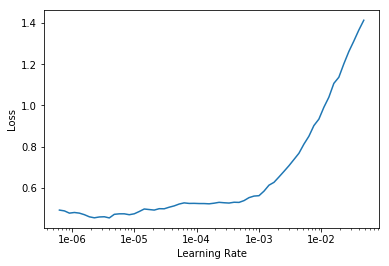

In [101]:
learn.lr_find()
learn.recorder.plot()

In [102]:
learn.fit_one_cycle(5, max_lr=slice(5e-6, 5e-5))

epoch,train_loss,valid_loss,error_rate
1,0.469294,0.314034,0.099509
2,0.378112,0.231862,0.073973
3,0.313992,0.186880,0.061887
4,0.251526,0.169748,0.056979
5,0.248244,0.170610,0.057161


### resnet-34 was better with an error_rate of `0.038986` , so will switch back

## Progressive Resizing. (image size : 32 => 64 => 128 => 256 ) [resnet34]

#### (32, 32)

In [108]:
data = get_data(32, bs=bs)

In [109]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [125]:
learn.load('stage-1_16-cycles')
learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 32, 32])

In [126]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


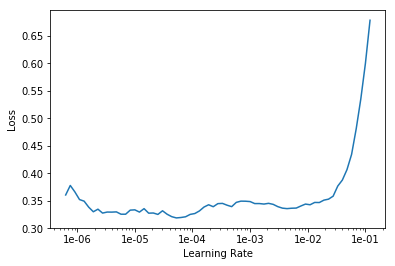

In [127]:
learn.lr_find()
learn.recorder.plot()

In [128]:
lr = 1e-3/2
learn.fit_one_cycle(4, slice(lr))

epoch,train_loss,valid_loss,error_rate
1,0.352351,0.196009,0.062432
2,0.353405,0.196870,0.063886
3,0.318195,0.189156,0.061341
4,0.322283,0.184023,0.059887


In [129]:
learn.save('stage-1_34-32p')

In [130]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(1e-6, lr/5))

epoch,train_loss,valid_loss,error_rate
1,0.308224,0.180596,0.059524
2,0.285487,0.166128,0.053072
3,0.265583,0.157646,0.052435
4,0.269205,0.152836,0.050527
5,0.255296,0.151949,0.050164


In [131]:
learn.save('stage-2_34-32p')

#### (64, 64)

In [132]:
data = get_data(64, bs)
learn.data = data

In [144]:
data.train_ds[0][0].shape

torch.Size([3, 64, 64])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


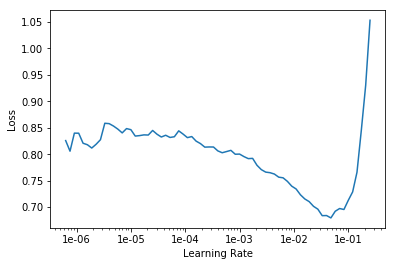

In [134]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [135]:
lr = 1e-2
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate
1,0.345291,0.178551,0.058252
2,0.311067,0.156251,0.050436
3,0.222954,0.106332,0.035078
4,0.143168,0.073444,0.022992
5,0.130134,0.068232,0.022992


In [136]:
learn.save('stage-1_34-64p')

In [142]:
learn.unfreeze()
learn.fit_one_cycle(5,slice(1e-6,lr/10))

epoch,train_loss,valid_loss,error_rate
1,0.136054,0.067768,0.021356
2,0.111700,0.053384,0.017357
3,0.082553,0.043611,0.014631
4,0.058781,0.033474,0.010723
5,0.046269,0.032180,0.010451


In [143]:
learn.save('stage-2_34-64p')

#### (128, 128)

In [ ]:
learn.load('stage-2_34-64p')

In [150]:
data = get_data(128, bs)
learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 128, 128])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


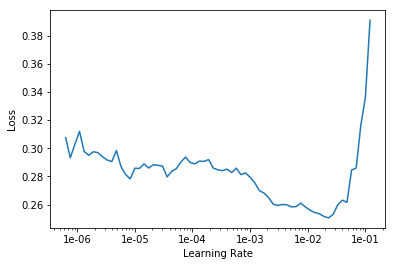

In [151]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [152]:
lr = 1e-2/2
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate
1,0.115380,0.052656,0.017993
2,0.096253,0.043081,0.013450
3,0.074079,0.031909,0.010905
4,0.062957,0.022555,0.006997
5,0.038085,0.022070,0.006907


In [153]:
learn.save('stage-1_34-128p')

In [154]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(1e-6, lr/5))

epoch,train_loss,valid_loss,error_rate
1,0.067094,0.025793,0.008179
2,0.060218,0.027768,0.009542
3,0.033288,0.019851,0.006907
4,0.022288,0.014949,0.005089
5,0.016313,0.013784,0.004453


In [155]:
learn.save('stage-2_34-128p')

#### (256, 256) original image size

In [ ]:
learn.load('stage-2_34-128p')

In [162]:
data = get_data(256, bs)
learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

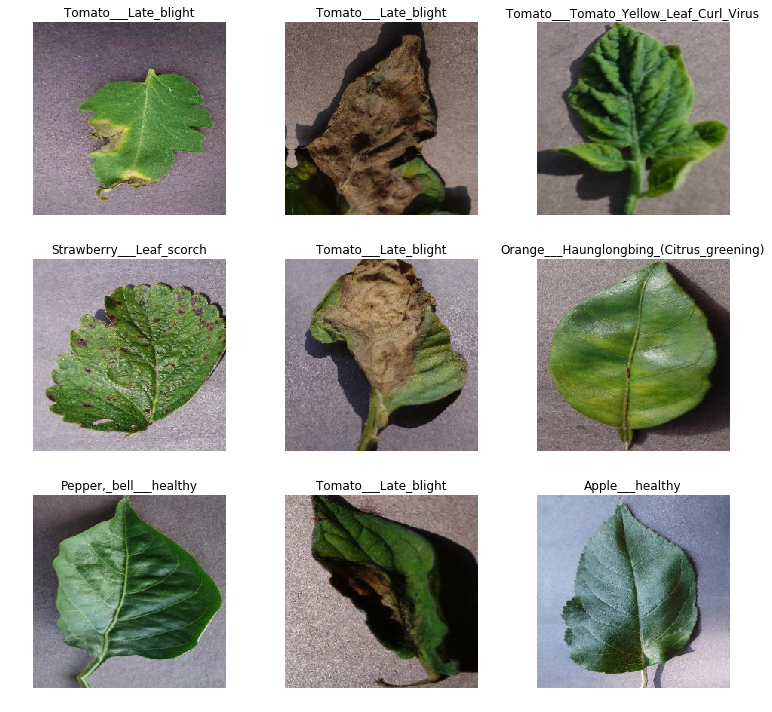

In [169]:
data.show_batch(rows=3, figsize=(11, 10))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


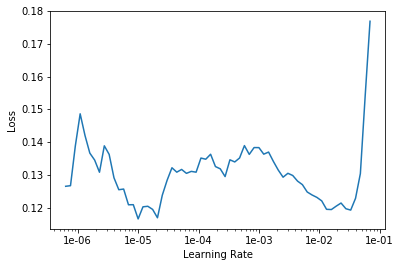

In [163]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [164]:
lr = 1e-2/2
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate
1,0.051081,0.056098,0.017812
2,0.043659,0.029791,0.008906
3,0.034067,0.020450,0.006361
4,0.026910,0.015944,0.004726
5,0.019494,0.013683,0.003999


In [165]:
learn.save('stage-1_34-256p')

In [166]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(1e-6, lr/5))

epoch,train_loss,valid_loss,error_rate
1,0.028340,0.024253,0.007724
2,0.036238,0.025344,0.007906
3,0.022854,0.015843,0.005362
4,0.010752,0.013149,0.003635
5,0.010014,0.010241,0.002635


In [167]:
learn.save('stage-2_34-256p')

#### ended up with a `resnet-34` model with an accuracy of `99.7365` on PlantVillage dataset in a time of  ~= 1.6 hr

In [168]:
learn.load('stage-2_34-256p')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (44016 items)
[Category Grape___Leaf_blight_(Isariopsis_Leaf_Spot), Category Grape___Leaf_blight_(Isariopsis_Leaf_Spot), Category Grape___Leaf_blight_(Isariopsis_Leaf_Spot), Category Grape___Leaf_blight_(Isariopsis_Leaf_Spot), Category Grape___Leaf_blight_(Isariopsis_Leaf_Spot)]...
Path: PlantVillage
x: ImageItemList (44016 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: PlantVillage;

Valid: LabelList
y: CategoryList (11004 items)
[Category Grape___Leaf_blight_(Isariopsis_Leaf_Spot), Category Grape___Leaf_blight_(Isariopsis_Leaf_Spot), Category Grape___Leaf_blight_(Isariopsis_Leaf_Spot), Category Grape___Leaf_blight_(Isariopsis_Leaf_Spot), Category Grape___Leaf_blight_(Isariopsis_Leaf_Spot)]...
Path: PlantVillage
x: ImageItemList (11004 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...